In [326]:
import numpy as np
import math
import random
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [327]:
def fn(x):
    y=-math.exp(x**2/100)*math.sin(13*x - x**4)**5*math.sin(1 - 3*x**2)**2
    return y

In [328]:
x=np.arange(-2,2,0.05)
y=[]
for i in x:
    y.append(fn(i))

In [329]:
def N():
    n=random.uniform(-2,2)
    return(n)

In [330]:
def Tp(c,n,T,fn):
    if fn(n)<fn(c):
        return(1.0)
    else:
        DE=fn(c)-fn(n)
        x=DE/T
        p=math.exp(x)
        return(p)

In [331]:
def simAnn(fn):
    c=0
    b=c
    bf=fn(b)
    T=0.00001
    cooling_rate=0.001
    while T>0.0000001:
        for n0 in range(0,1000000):
            n=N()
            nf=fn(n)
            p=Tp(c,n,T,fn)
            if p>random.random():
                c=n
                cf=nf
            if nf<bf:
                bf=nf
                b=n
        T*=cooling_rate
    return(b,bf)

In [332]:
simAnn(fn)

(1.3656886835017845, -0.9579456035176046)

Verification

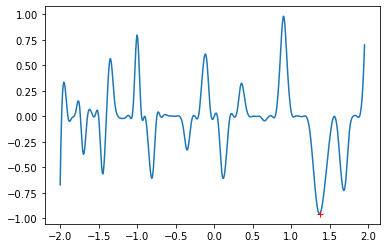

In [333]:
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
c,fc=simAnn(fn)
plt.plot(c,fc,'r+')

Coin Probability

In [334]:
def fnc(x):    
    ax=x*cx
    g=math.e**ax
    p=g/sum(g)
    px=cx*p
    s=sum(px)
    f=abs(mean-s)
    return(f)

In [335]:
coin=[1, 5, 10, 25, 50, 100]
cx=np.array(coin)
mean=10.3828

In [336]:
alpha=[-1,0]
t=0

In [337]:
#Coin
a0=simAnn(fnc)
a0

(-0.03773222090348005, 0.0001485399682028543)

Estimated optimal probabilities

In [338]:
ax=a0[0]*cx
g=math.e**ax
p=g/sum(g)
p

array([0.31670063, 0.27233367, 0.22551055, 0.12804524, 0.04985297,
       0.00755695])

In [339]:
px=cx*p
s=sum(px)
s

10.382948539968202

In [340]:
print(f'actual Mean:{mean}')
print(f'observed Mean:{s}')
print(f'The difference between\nobserved mean & estimated mean\n(loss value):{abs(mean-s)}')

actual Mean:10.3828
observed Mean:10.382948539968202
The difference between
observed mean & estimated mean
(loss value):0.0001485399682028543


Verification

In [341]:
x=np.arange(-5,1,0.01)
y=[]
for i in x:
    y.append(fnc(i))

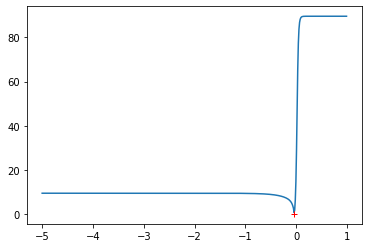

In [342]:
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.plot(a0[0],fnc(a0[0]),'r+')